In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
# The error message ParserError, indicates that there is a mismatch in the number of columns expected and the number of columns
#found in my CSV file. In this case, it expected 4 fields in line 19673 but found 5.
#This type of error probably occurs when there are commas within a field that aren't enclosed in double quotes, causing the parser 
#to incorrectly interpret them as field separators. The other cleaned dataset will be used going forward
#df_clean = pd.read_table('cleaned_ProjectTweets.csv', sep=',', error_bad_lines=False)

In [4]:
df_cleaner = pd.read_csv('cleanedt_ProjectTweets.csv', dtype={0: str}) #the header was changed to string type

df_cleaner.head(5)

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  
0                                       que me muera  
1  happy for coach stringer hof co now if i can o...  
2  keeeerrrrriiiiii i really have nothing better ...  
3                cant sleep dam naps lol and its hot  
4  thank you for being a great character on house...

In [5]:
df=df_cleaner
df.head(5)

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  
0                                       que me muera  
1  happy for coach stringer hof co now if i can o...  
2  keeeerrrrriiiiii i really have nothing better ...  
3                cant sleep dam naps lol and its hot  
4  thank you for being a great character on house...

In [6]:
# Check for any NaN values in the 'tweets' column
nan_values = df['tweet'].isna()
print("Number of NaN values in 'tweets':", nan_values.sum())

Number of NaN values in 'tweets': 3707


In [7]:
import pandas as pd
import nltk
from nltk.collocations import TrigramCollocationFinder
from nltk.tokenize import word_tokenize
from collections import Counter  
from nltk.probability import FreqDist 
from nltk.text import Text

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')  
nltk.download('vader_lexicon') 
nltk.download('punkt') 

# NLTK operations
stopwords = nltk.corpus.stopwords.words("english")

# Getting all tweets separated by a space
all_tweets = df['tweet'].str.cat(sep=' ')

# Tokenize
tkwords = word_tokenize(all_tweets)

# Remove stopwords and non-alphabetic tokens
filtered_words = [word for word in tkwords if word.isalpha() and word.lower() not in stopwords]

# Get the frequency distribution
fd = FreqDist(filtered_words)  

# Print the 10 most common words
print("Top 10 Most Common Words in Frequency Distribution:")
for word, frequency in fd.most_common(10):
    print(f"{word}: {frequency}")
#The above code concatenates all the tweets into a single string, tokenizes the string into words, 
#filters out stopwords and non-alphabetic tokens, and then calculates and prints the 10 most common words.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 Most Common Words in Frequency Distribution:
im: 177631
good: 88220
day: 83371
get: 79737
like: 77263
go: 72704
got: 69342
dont: 67003
today: 64367
going: 63907


In [8]:
# Create an NLTK Text object from filtered words
text_obj = Text(filtered_words)

# Specific word to find concordances with
specific_word = 'good'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'good':
Displaying 5 of 88220 matches:
 time moment coach forced retirement good years ago due injury coach us havent
ndstill today sorry bout car btw kat good vacation personally st year new jobz
d ownmust life shite studying finals good ol stock valuation options amp futur
 grocery shopping lead exciting life good thing riding bike keeps blowing head
igting twit curse twitter curse oooh good im fine thanks baking cricket lookin


In [9]:
specific_word = 'happy'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'happy':
Displaying 5 of 26216 matches:
que muera happy coach stringer hof co finish term pa
ooooo twitter news weathers fab work happy raining going lena day sucks trying 
o hate public transportation raining happy monday alright got cold think feelin
 khong xoaquot sign week argh boo oh happy days australiain recsion thought alr
ood snake house futsal week feel fat happy mothers day beautiful woman especial


In [10]:
specific_word = 'great'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'great':
Displaying 5 of 32712 matches:
ot cant sleep dam naps lol hot thank great character house im sad see go wan na
time realise talk cruise summer tour great making us fans europe sad xx holy sh
ly going outside dont want dont feel great hate go away keep missing first part
 holy crap im making progress sounds great wish could go take photos web sites 
 show drop text saying hes part crew great birds moms place sounds like inside 


In [11]:
specific_word = 'wonderful'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'wonderful':
Displaying 5 of 3808 matches:
tart goin back forreall lol sounds wonderful envy havent camped years think gla
ill haent prebooked ooh sun always wonderful cloudy storms bowling green kentuc
 stupid lady cut bangs short grrrr wonderful asked sad pics etc see something s
npacking weather dancing edinburgh wonderful morning happy mothers daymy mommy 
er shame guys would loved see sign wonderful wekend stockholm unfortenately cam


In [12]:
# This is just a test for my own knowledge 
specific_word = 'stocks'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'stocks':
Displaying 5 of 44 matches:
 years think passing global fishing stocks fully exploited amp fish farms pose
s saturday guess every body selling stocks results jessi likey fob sorry files
tting sick cant believe forever ran stocks headband ugh dying one cant seem ge
ing database ltltlt tried learn day stocks trading friday slownot best day tak
iran nope saving burnout looks like stocks ran fifa would good bought weeks ba


In [13]:
specific_word = 'bad'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'bad':
Displaying 5 of 26657 matches:
abrinas im bored work haha already im bad student facebook tard cant get hold c
 hours think im gettin cold day going bad worsei broke shoe morning windy freez
eadache wore cuddle shirt got cuddles bad im sick cant enjoy killers like wan n
ize fixe bro u stop followin traffics bad guess prayers impossible answer chang
feeling well cancel tuition noor felt bad sighs need buck things literally yes 


In [14]:
specific_word = 'upset'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'upset':
Displaying 5 of 2645 matches:
 dont know play cricket u got yuvraj upset cant find pair sexy cutout sandal bo
e creepy chan win antm favorite sooo upset missed little rascals tv today love 
think one person work would ask went upset near tears spoke rob moring pouring 
y life rocksall need chris bizzle im upset didnt get see might kill green turtl
rytools runtergeladen der server ist upset sun rain instead howards auditioning


In [15]:
specific_word = 'modest'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'modest':
Displaying 5 of 46 matches:
ht tired jb today show miss hearing modest mouse wilma cant buy tickets get co
y end day oh neee drunkenly singing modest mouse top lungs wonder neighbors co
ater didnt get told us well getting modest gift year noooooooo wish saw advert
oftie today im lameee informed need modest wear full piece bathing suit im ok 
an fish shop gawping bewbs violated modest mouse touring august uk dates yet h


In [16]:
specific_word = 'horrible'  
print(f"\nConcordances for word '{specific_word}':")
text_obj.concordance(specific_word, lines=5)  


Concordances for word 'horrible':
Displaying 5 of 2847 matches:
wednesday around end may im gon na horrible time realise talk cruise summer to
 signing nowww school tmr sad must horrible families charles de gaulle airport
ope didnt work imma sleep tomorrow horrible day ovr nite nite twitterlings okm
ad cold today geuss overbasketball horrible pain shin splint right leg gon na 
y time forgot hug say goodbye feel horrible wont see whole week ive officially


In [17]:
# A TrigramCollocationFinder instance was created from the filtered words
trigram_finder = TrigramCollocationFinder.from_words(filtered_words)

# Optionally apply filters to the finder ( filter out trigrams that occur only once)
trigram_finder.apply_freq_filter(2) # trigrams that apear twice or more

# Find and print the most common trigrams
most_common_trigrams = trigram_finder.ngram_fd.most_common(20)
print("\nMost Common Trigrams in Frequency Distribution:")
for trigram, frequency in most_common_trigrams:
    print(f"{' '.join(trigram)}: {frequency}")

# Tabulate the most common trigrams 
print("\nTabulation of Most Common Trigrams:")
trigram_finder.ngram_fd.tabulate(5)  


Most Common Trigrams in Frequency Distribution:
im gon na: 6318
wan na go: 3993
dont wan na: 2948
cant wait see: 2230
happy mothers day: 2150
gon na miss: 1820
gon na go: 1781
mtv movie awards: 1349
wan na see: 1286
dont want go: 1180
got ta go: 1147
gon na get: 1115
got ta get: 986
hope feel better: 945
wish could go: 934
getting ready go: 905
cant wait till: 864
im going miss: 794
got ta love: 765
dont feel good: 759

Tabulation of Most Common Trigrams:
        ('im', 'gon', 'na')         ('wan', 'na', 'go')       ('dont', 'wan', 'na')     ('cant', 'wait', 'see') ('happy', 'mothers', 'day') 
                       6318                        3993                        2948                        2230                        2150 


## Sentiment Analyzer

In [18]:
# The error that I got initially while trying to run BERT indicated that i have rows with no values
# The below checks if any NaN values are present in the 'tweet' column
nan_values = df['tweet'].isna()
print("Number of NaN values in 'tweets':", nan_values.sum())

Number of NaN values in 'tweets': 3707


In [19]:
# Display all rows where 'tweets' is NaN
nan_rows = df[df['tweet'].isna()]
print(nan_rows)

             userid                      timestamp         username tweet
86       1556058077  2009-04-19T05:30:42.000+01:00        gi_gi_bee   NaN
1187     1979349725  2009-05-31T10:40:01.000+01:00     violetscream   NaN
1323     1986332248  2009-06-01T02:41:05.000+01:00     therealSUNNI   NaN
1510     1998420477  2009-06-02T02:31:09.000+01:00  anthonymartinez   NaN
1589     2002015204  2009-06-02T10:51:27.000+01:00           Pafuxu   NaN
...             ...                            ...              ...   ...
1585533  1969888947  2009-05-30T09:36:43.000+01:00           reiver   NaN
1585926  1980053286  2009-05-31T13:31:07.000+01:00     balabharathy   NaN
1586195  1989855387  2009-06-01T11:02:47.000+01:00   pochti_stalker   NaN
1587624  2068276682  2009-06-07T21:48:20.000+01:00      antistatica   NaN
1588126  2191545761  2009-06-16T13:30:02.000+01:00         maddysen   NaN

[3707 rows x 4 columns]


In [20]:
# All the rows where 'tweet' column has NaN values were dropped.
#This might have happend during the original cleaning for tweets that had only emoticons or # etc
df = df.dropna(subset=['tweet'])

# Dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584469 entries, 0 to 1588175
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userid     1584469 non-null  object
 1   timestamp  1584469 non-null  object
 2   username   1584469 non-null  object
 3   tweet      1584469 non-null  object
dtypes: object(4)
memory usage: 60.4+ MB
None


In [21]:
nan_values = df['tweet'].isna()
print("Number of NaN values in 'tweets':", nan_values.sum())

Number of NaN values in 'tweets': 0


In [22]:
# Check for any empty strings in the 'tweets' column
empty_strings = df['tweet'] == ''
print("Number of empty strings in 'tweets':", empty_strings.sum())

Number of empty strings in 'tweets': 0


In [23]:
# Check for strings that are only whitespace in the 'tweets' column
whitespace_strings = df['tweet'].str.isspace()
print("Number of whitespace strings in 'tweets':", whitespace_strings.sum())

Number of whitespace strings in 'tweets': 0


In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# SentimentIntensityAnalyzer initialization 
sia = SentimentIntensityAnalyzer()

def get_polarity_scores(tweet):
    # Convert to string if the tweet is not already a string
    if not isinstance(tweet, str):
        tweet = str(tweet)
    return sia.polarity_scores(tweet)

# Apply the function to the 'tweet' column to get the scores
df['polarity_scores'] = df['tweet'].apply(get_polarity_scores)

# Expand the dictionary into separate columns
df['negative'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neg'])
df['neutral'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neu'])
df['positive'] = df['polarity_scores'].apply(lambda score_dict: score_dict['pos'])
df['compound'] = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])

df.head(5)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\swast\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\swast\AppData\Local\Temp\ipykernel_15320\1713375916.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity_scores'] = df['tweet'].apply(get_polarity_scores)
C:\Users\swast\AppData\Local\Temp\ipykernel_15320\1713375916.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['negative'] = df['polarity_scores'].apply(lambda s

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  \
0                                       que me muera   
1  happy for coach stringer hof co now if i can o...   
2  keeeerrrrriiiiii i really have nothing better ...   
3                cant sleep dam naps lol and its hot   
4  thank you for being a great character on house...   

                                     polarity_scores  negative  neutral  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
1  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...     0.000    0.802   
2  {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp...     0.151    0.849   
3  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...     0.000    0.714   
4  {'neg': 0.15, 'neu': 0.531, 'pos': 0.319, 'com...     0.150    0.531   

   positive  compound  
0     0.000    0.0000  
1     0.198    0.5719  
2     0.000   -0.3959  
3     0.286    0.4215  
4     0.319    0.5423

In [25]:
# compound score into a separate column
df['compound'] = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])

# Mean of the compound scores
average_compound_score = df['compound'].mean()

print("Average Compound Score for the entire dataset:", average_compound_score)

Average Compound Score for the entire dataset: 0.13031860250980168


C:\Users\swast\AppData\Local\Temp\ipykernel_15320\1346495452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'] = df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])


In [26]:
# The below model was taking a lot of time so I decieded to add a progress bar so I can see how the model is progressing 
#!pip install tqdm
from tqdm.notebook import tqdm
tqdm.pandas()

In [27]:
#!pip install torch torchvision torchaudio (https://www.kaggle.com/code/prakharrathi25/sentiment-analysis-using-bert)
#!pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from torch.nn.functional import softmax
import torch

# The below is loading the pre-trained BERT tokenizer. This tool breaks the text into tokens that BERT understands.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Loaded the pre-trained BERT model, which is used to predict the sentiment of a piece of text.
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Defined a function to predict sentiment with BERT.
def get_bert_sentiment(text):
    # The tokenizer converts the text into a format that the model can understand.
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # BERT needs special tokens to understand the start and end of sentences.
        max_length=128,  # This trims the text to a maximum length to keep processing consistent.
        truncation=True,  # If the text is too long, it will be truncated to fit.
        padding='max_length',  # If the text is too short, it will be padded with zeros.
        return_tensors='pt'  # This tells the tokenizer to return PyTorch tensors.
    )
    
    # The model to predict the sentiment. This outputs the raw scores.
    with torch.no_grad():  # This tells PyTorch that we don't need to calculate gradients (as we're not training).
        outputs = model(**inputs)
    
    # The raw scores are called logits. We use softmax to convert them into probabilities.
    probs = softmax(outputs.logits, dim=1)
    
    # We return the probability of the positive class. We assume class 1 is 'positive'.
    return probs[:, 1].item()

# Applied the function to each tweet to get the sentiment score.
df['bert_sentiment_score'] = df['tweet'].progress_apply(get_bert_sentiment)

# Defined a threshold to separate positive, neutral, and negative sentiments.
neutral_threshold = 0.1  # This is a hyperparameter that can be changed

# This function classifies the sentiment based on the score and the threshold.
def classify_sentiment(prob_positive, neutral_thresh=0.1):
    if prob_positive > (0.5 + neutral_thresh):
        return 'POSITIVE'
    elif prob_positive < (0.5 - neutral_thresh):
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

# Applied the classification function to the sentiment scores to label each tweet.
df['bert_sentiment_label'] = df['bert_sentiment_score'].apply(
    lambda score: classify_sentiment(score, neutral_threshold)
)

print(df)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/1584469 [00:00<?, ?it/s]

KeyboardInterrupt: 

C:\Users\swast\AppData\Local\Temp\ipykernel_15320\4023438174.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_text'] = df['tweet'].apply(tokenize_text)


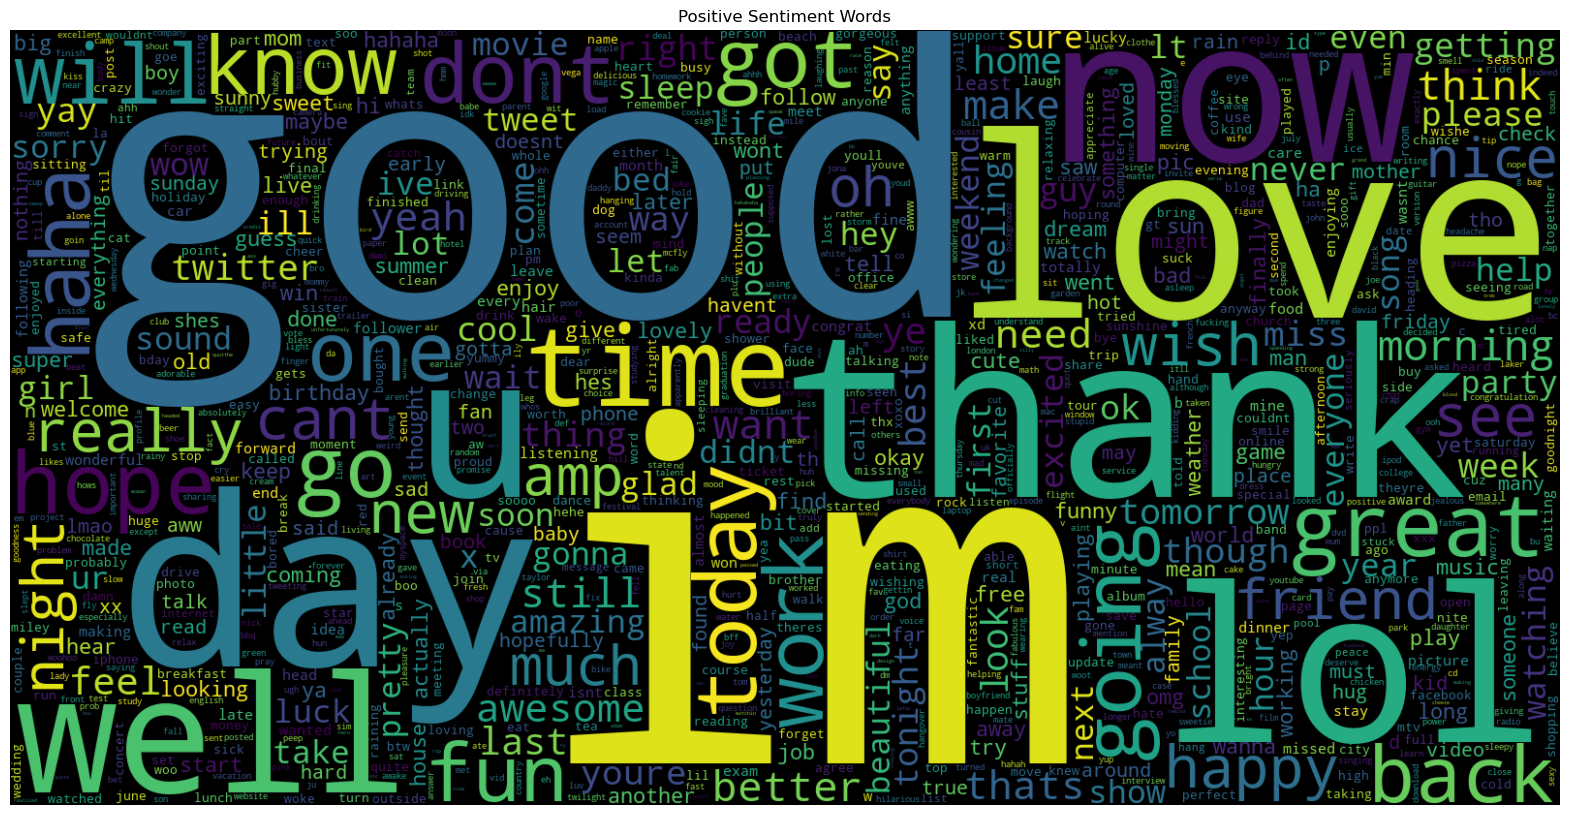

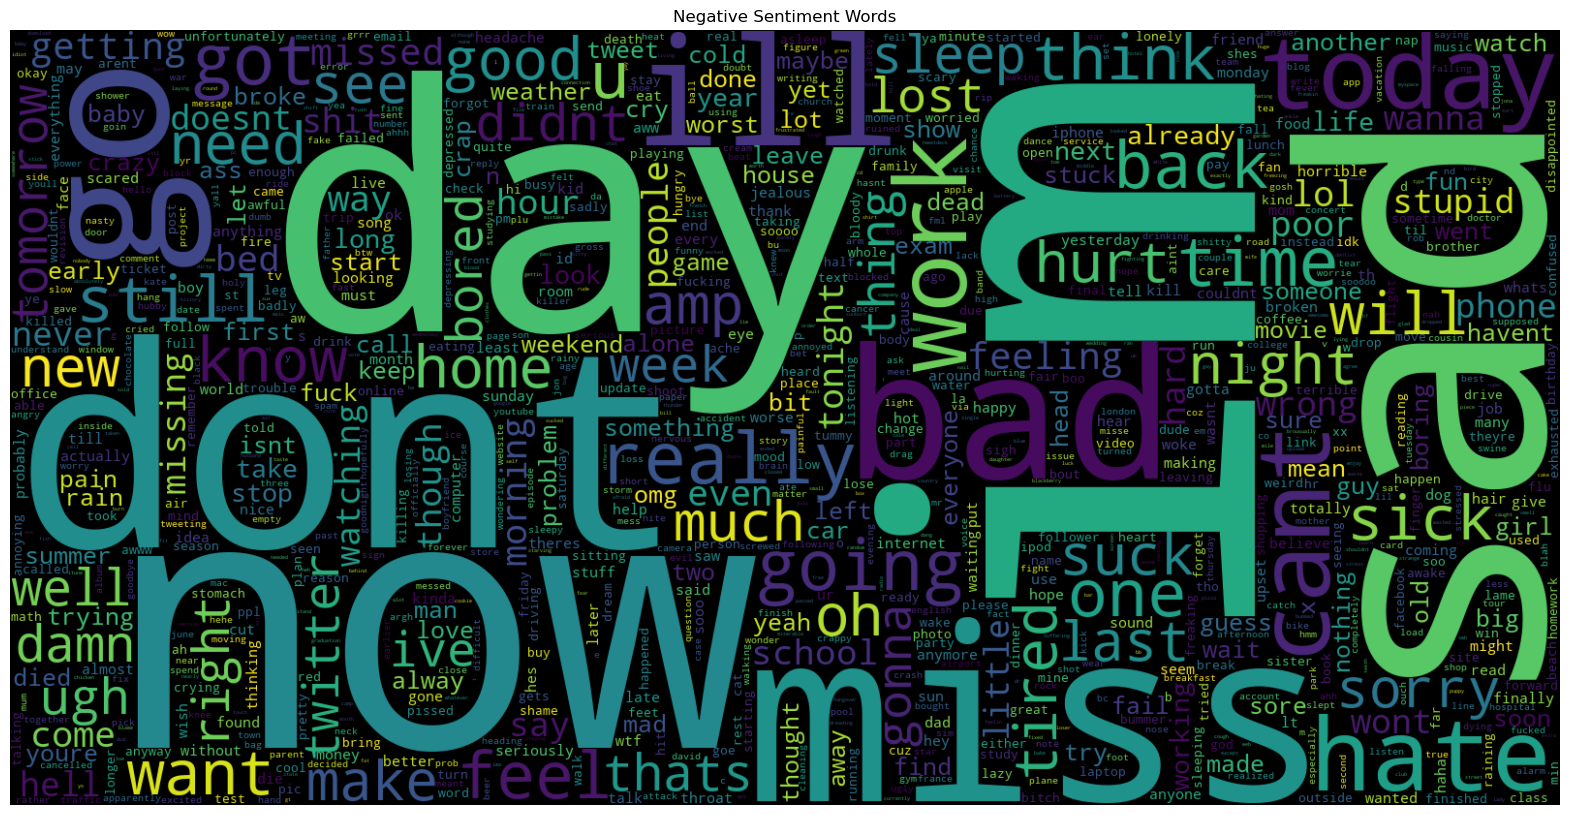

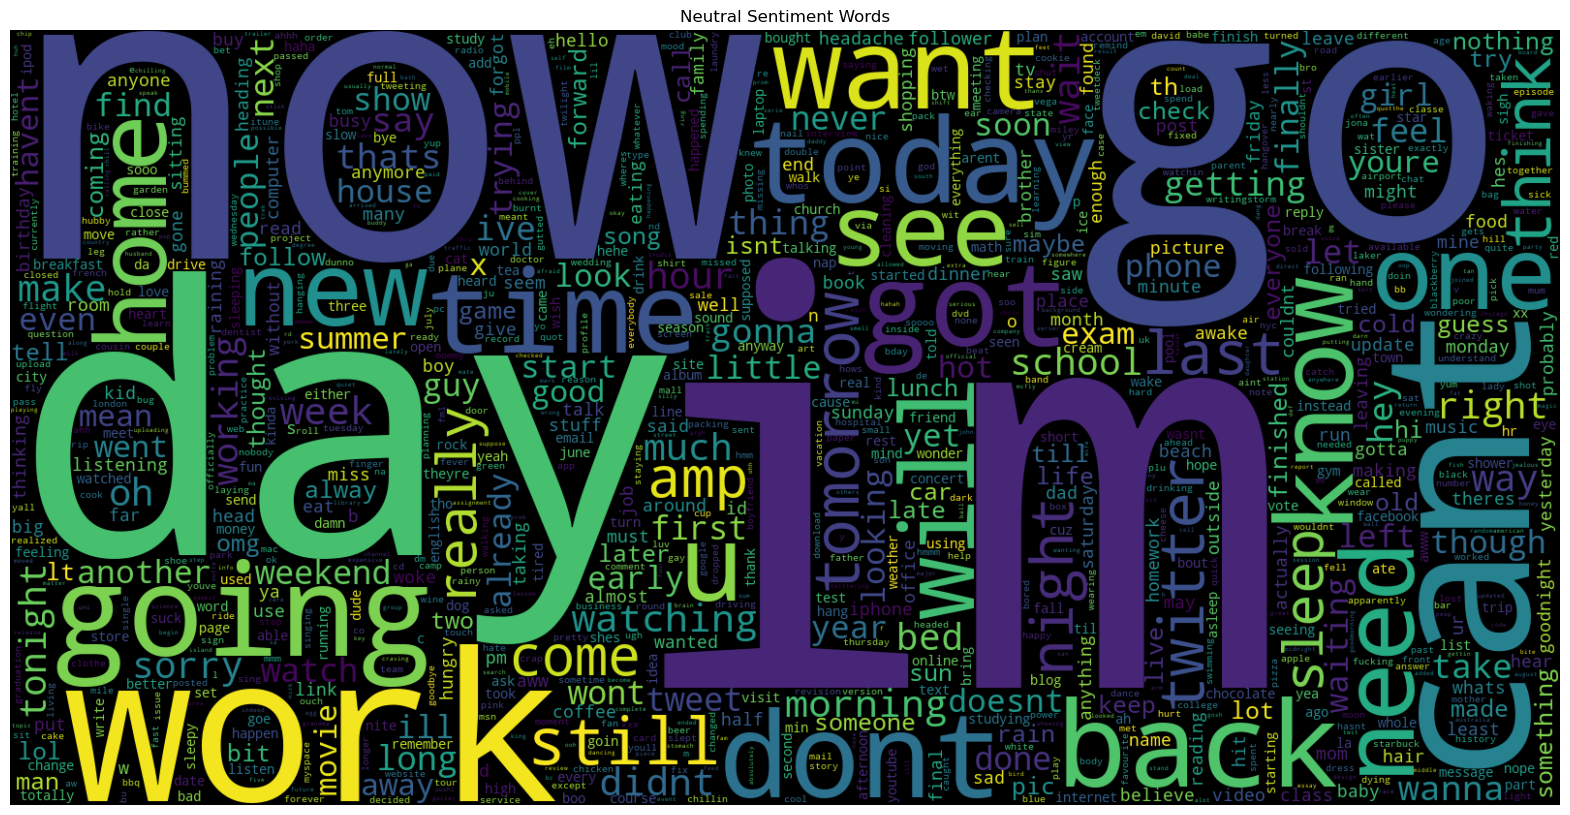

In [28]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to tokenize the words in the tweets
def tokenize_text(tweet):
    return word_tokenize(tweet)

# Tokenize the words in the tweets
df['tokenized_text'] = df['tweet'].apply(tokenize_text)

# Separating data by sentiment
data_positive = " ".join(df[df['compound'] > 0.1]['tweet'])
data_negative = " ".join(df[df['compound'] < -0.1]['tweet'])
data_neutral = " ".join(df[(df['compound'] >= -0.1) & (df['compound'] <= 0.1)]['tweet'])

# Function to create and display word clouds
def generate_wordcloud(data, title):
    wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(data)
    plt.figure(figsize=(20, 20))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud(data_positive, 'Positive Sentiment Words')
generate_wordcloud(data_negative, 'Negative Sentiment Words')
generate_wordcloud(data_neutral, 'Neutral Sentiment Words')

In [29]:
#Created the Word Corpus and Sentiment Labeling
from collections import defaultdict

# Created a dictionary where keys are sentiments and values are lists of words
corpus = defaultdict(list)

for index, row in df.iterrows():
    words = word_tokenize(row['tweet'])
    sentiment = 'neutral'  # Default sentiment
    if row['compound'] > 0.1:
        sentiment = 'positive'
    elif row['compound'] < -0.1:
        sentiment = 'negative'
    for word in words:
        corpus[sentiment].append(word)

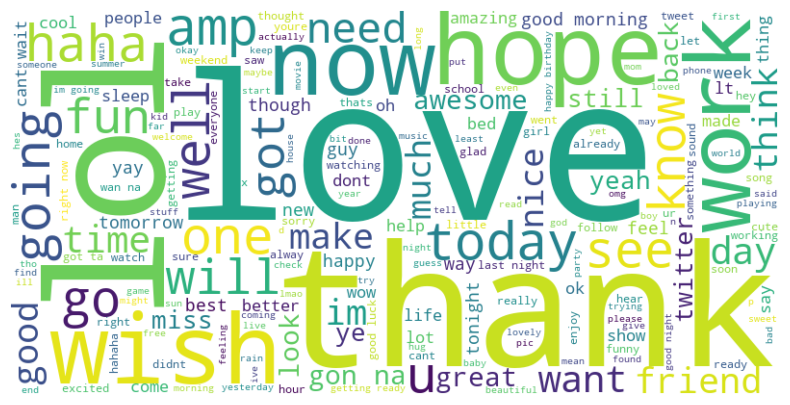

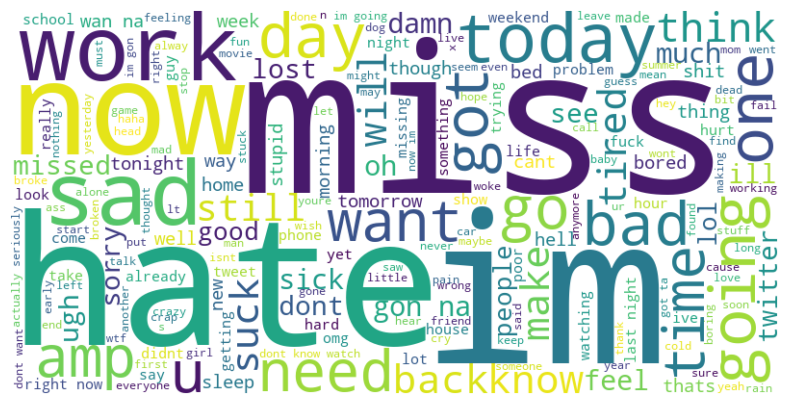

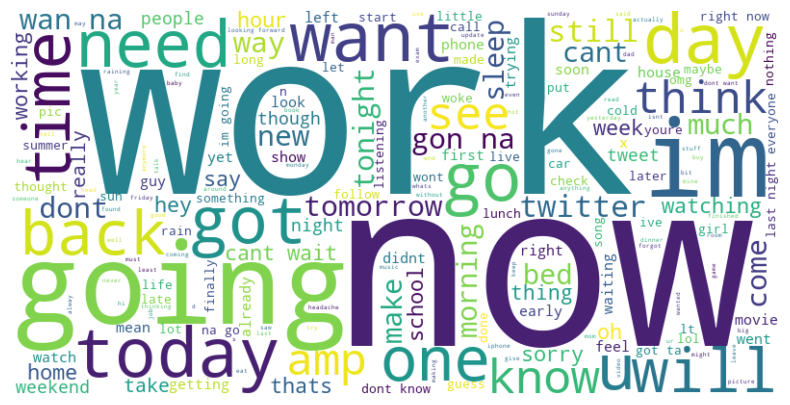

In [30]:
#Generate Word Clouds for Each Sentiment
from wordcloud import WordCloud

def generate_wordcloud_from_corpus(corpus, sentiment):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(corpus[sentiment]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds
generate_wordcloud_from_corpus(corpus, 'positive')
generate_wordcloud_from_corpus(corpus, 'negative')
generate_wordcloud_from_corpus(corpus, 'neutral')

In [31]:
#Create a Dashboard to Switch Between Word Clouds
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a dropdown widget
sentiment_dropdown = widgets.Dropdown(
    options=['positive', 'negative', 'neutral'],
    value='positive',
    description='Sentiment:',
)

# Display word cloud based on dropdown selection
def display_wordcloud(change):
    clear_output(wait=True)
    display(sentiment_dropdown)
    generate_wordcloud_from_corpus(corpus, change['new'])

# Set up observer to handle changes in dropdown
sentiment_dropdown.observe(display_wordcloud, names='value')

# Display the dropdown
display(sentiment_dropdown)

Dropdown(description='Sentiment:', options=('positive', 'negative', 'neutral'), value='positive')

In [32]:
from nltk.tokenize import word_tokenize

# Tokenize each tweet and store in a new column
df['tokens'] = df['tweet'].progress_apply(word_tokenize)

# Flatten the list of tokens to create the corpus
flat_corpus = [word for tokens in df['tokens'] for word in tokens]

  0%|          | 0/1584469 [00:00<?, ?it/s]

C:\Users\swast\AppData\Local\Temp\ipykernel_15320\3889127961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tweet'].progress_apply(word_tokenize)


In [33]:
def generate_concordance(corpus, target_word):
    text = Text(corpus)
    concordance_list = text.concordance_list(target_word, width=80, lines=25)
    # Extract surrounding words for the word cloud
    surrounding_words = [word for conc in concordance_list for word in conc.line.split() if word != target_word]
    return concordance_list, surrounding_words

def display_concordance(concordance_list):
    for concordance in concordance_list:
        print(concordance.line)
        
def generate_wordcloud_from_list(word_list):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(word_list))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [34]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Textbox widget for user input
target_word_textbox = widgets.Text(
    value='',
    description='Target Word:',
    disabled=False
)

out = widgets.Output()

# Handler function to update concordance and word cloud based on input
def on_target_word_submit(change):
    with out:
        clear_output(wait=True)
        target_word = target_word_textbox.value  # Accessing the value of the textbox directly
        if target_word:
            concordance_list, surrounding_words = generate_concordance(flat_corpus, target_word)
            display_concordance(concordance_list)
            print("\nWord Cloud for surrounding words:\n")
            generate_wordcloud_from_list(surrounding_words)

# Setup to handle the user inputs a target word
target_word_textbox.on_submit(on_target_word_submit)

# Display the textbox and output widgets
display(target_word_textbox, out)

Text(value='', description='Target Word:')

Output()

## Time Series Analysis 

In [35]:
df.head(5)

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  \
0                                       que me muera   
1  happy for coach stringer hof co now if i can o...   
2  keeeerrrrriiiiii i really have nothing better ...   
3                cant sleep dam naps lol and its hot   
4  thank you for being a great character on house...   

                                     polarity_scores  negative  neutral  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
1  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...     0.000    0.802   
2  {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp...     0.151    0.849   
3  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...     0.000    0.714   
4  {'neg': 0.15, 'neu': 0.531, 'pos': 0.319, 'com...     0.150    0.531   

   positive  compound                                     tokenized_text  \
0     0.000    0.0000                                   [que, me, muera]   
1     0.198    0.5719  [happy, for, coach, stringer, hof, co, now, if...   
2     0.000   -0.3959  [keeeerrrrriiiiii, i, really, have, nothing, b...   
3     0.286    0.4215       [cant, sleep, dam, naps, lol, and, its, hot]   
4     0.319    0.5423  [thank, you, for, being, a, great, character, ...   

                                              tokens  
0                                   [que, me, muera]  
1  [happy, for, coach, stringer, hof, co, now, if...  
2  [keeeerrrrriiiiii, i, really, have, nothing, b...  
3       [cant, sleep, dam, naps, lol, and, its, hot]  
4  [thank, you, for, being, a, great, character, ...

In [36]:
df = df.drop(columns=['tokenized_text', 'tokens'])
df.head(5)

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  \
0                                       que me muera   
1  happy for coach stringer hof co now if i can o...   
2  keeeerrrrriiiiii i really have nothing better ...   
3                cant sleep dam naps lol and its hot   
4  thank you for being a great character on house...   

                                     polarity_scores  negative  neutral  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...     0.000    1.000   
1  {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'comp...     0.000    0.802   
2  {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp...     0.151    0.849   
3  {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...     0.000    0.714   
4  {'neg': 0.15, 'neu': 0.531, 'pos': 0.319, 'com...     0.150    0.531   

   positive  compound  
0     0.000    0.0000  
1     0.198    0.5719  
2     0.000   -0.3959  
3     0.286    0.4215  
4     0.319    0.5423

In [37]:
df.to_csv('final.csv', index=False)

In [38]:
#df = pd.read_csv('final.csv')
#df.head(5)

In [39]:
# "polarity_scores is also not required as the sentiment scores are already extracted
df = df.drop(columns=['polarity_scores'])
df.head(5)

userid                      timestamp       username  \
0  1467812025  2009-04-07T06:20:09.000+01:00        mimismo   
1  1468032862  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  1468043104  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  1468078493  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  1468242583  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  negative  neutral  \
0                                       que me muera     0.000    1.000   
1  happy for coach stringer hof co now if i can o...     0.000    0.802   
2  keeeerrrrriiiiii i really have nothing better ...     0.151    0.849   
3                cant sleep dam naps lol and its hot     0.000    0.714   
4  thank you for being a great character on house...     0.150    0.531   

   positive  compound  
0     0.000    0.0000  
1     0.198    0.5719  
2     0.000   -0.3959  
3     0.286    0.4215  
4     0.319    0.5423

In [40]:
# To simply the dataset the userid column was also removed
df = df.drop(columns=['userid'])
df.head(5)

timestamp       username  \
0  2009-04-07T06:20:09.000+01:00        mimismo   
1  2009-04-07T07:21:35.000+01:00   lamarmcarter   
2  2009-04-07T07:24:53.000+01:00   Geoffasaurus   
3  2009-04-07T07:35:44.000+01:00    kennyduduxd   
4  2009-04-07T08:30:07.000+01:00  Tsukihysteria   

                                               tweet  negative  neutral  \
0                                       que me muera     0.000    1.000   
1  happy for coach stringer hof co now if i can o...     0.000    0.802   
2  keeeerrrrriiiiii i really have nothing better ...     0.151    0.849   
3                cant sleep dam naps lol and its hot     0.000    0.714   
4  thank you for being a great character on house...     0.150    0.531   

   positive  compound  
0     0.000    0.0000  
1     0.198    0.5719  
2     0.000   -0.3959  
3     0.286    0.4215  
4     0.319    0.5423

In [41]:
# We had some errors with the date format.Pandas couldn't identify the time format.
# Attempt to convert 'timestamp' to datetime and filter out any incorrect entries
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

In [42]:
# Check if there are any entries that couldn't be converted
incorrect_timestamps = df['timestamp'].isnull().sum()

In [43]:
incorrect_timestamps

2

In [44]:
# Drop rows with incorrect_timestamps
if incorrect_timestamps > 0:
    df = df.dropna(subset=['timestamp'])
df.head(5)

timestamp       username  \
0 2009-04-07 06:20:09+01:00        mimismo   
1 2009-04-07 07:21:35+01:00   lamarmcarter   
2 2009-04-07 07:24:53+01:00   Geoffasaurus   
3 2009-04-07 07:35:44+01:00    kennyduduxd   
4 2009-04-07 08:30:07+01:00  Tsukihysteria   

                                               tweet  negative  neutral  \
0                                       que me muera     0.000    1.000   
1  happy for coach stringer hof co now if i can o...     0.000    0.802   
2  keeeerrrrriiiiii i really have nothing better ...     0.151    0.849   
3                cant sleep dam naps lol and its hot     0.000    0.714   
4  thank you for being a great character on house...     0.150    0.531   

   positive  compound  
0     0.000    0.0000  
1     0.198    0.5719  
2     0.000   -0.3959  
3     0.286    0.4215  
4     0.319    0.5423

In [45]:
# Set the 'timestamp' as the index
df.set_index('timestamp', inplace=True)

In [46]:
df.head(5)

username  \
timestamp                                  
2009-04-07 06:20:09+01:00        mimismo   
2009-04-07 07:21:35+01:00   lamarmcarter   
2009-04-07 07:24:53+01:00   Geoffasaurus   
2009-04-07 07:35:44+01:00    kennyduduxd   
2009-04-07 08:30:07+01:00  Tsukihysteria   

                                                                       tweet  \
timestamp                                                                      
2009-04-07 06:20:09+01:00                                       que me muera   
2009-04-07 07:21:35+01:00  happy for coach stringer hof co now if i can o...   
2009-04-07 07:24:53+01:00  keeeerrrrriiiiii i really have nothing better ...   
2009-04-07 07:35:44+01:00                cant sleep dam naps lol and its hot   
2009-04-07 08:30:07+01:00  thank you for being a great character on house...   

                           negative  neutral  positive  compound  
timestamp                                                         
2009-04-07 06:20:09+01:00     0.000    1.000     0.000    0.0000  
2009-04-07 07:21:35+01:00     0.000    0.802     0.198    0.5719  
2009-04-07 07:24:53+01:00     0.151    0.849     0.000   -0.3959  
2009-04-07 07:35:44+01:00     0.000    0.714     0.286    0.4215  
2009-04-07 08:30:07+01:00     0.150    0.531     0.319    0.5423

In [47]:
# Check for missing values across the entire dataset
missing_values_before = df.isnull().sum()
missing_values_before

username    0
tweet       0
negative    0
neutral     0
positive    0
compound    0
dtype: int64

In [48]:
df.to_csv('ffinal.csv', index=True)

## Visualizing a time series

In [ ]:
#df = pd.read_csv('ffinal.csv', parse_dates=['timestamp'], index_col='timestamp')
#df.head(5)

In [49]:
# Group the data by date and count the number of tweets for each date
tweets_by_date = df.groupby(df.index.date)['tweet'].count()
tweets_by_date.head(5)

2009-04-07    20540
2009-04-18    15999
2009-04-19    33385
2009-04-20    18267
2009-04-21    10962
Name: tweet, dtype: int64

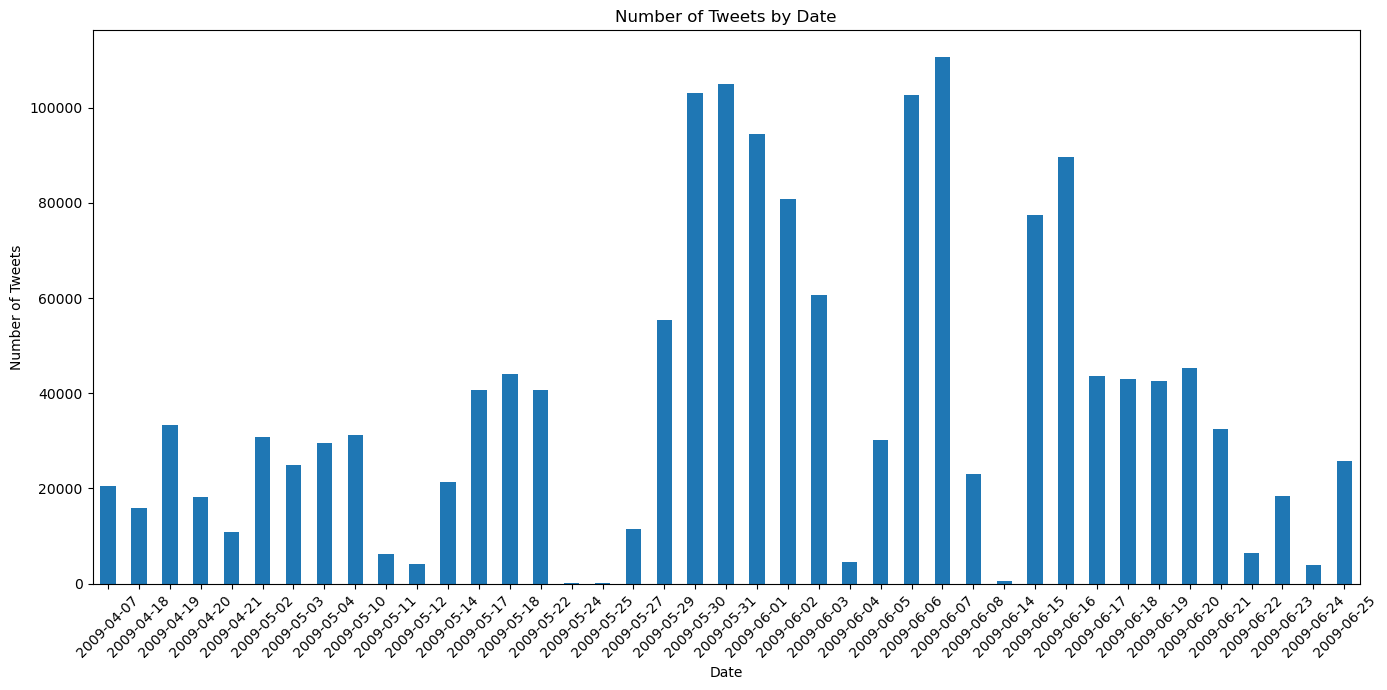

In [50]:
import numpy as np  # Add this line to import NumPy
import matplotlib.pyplot as plt
import matplotlib as mpl

# Plotting the number of tweets by date
plt.figure(figsize=(14, 7))
tweets_by_date.plot(kind='bar')
plt.title('Number of Tweets by Date')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit of x-axis labels
plt.show()

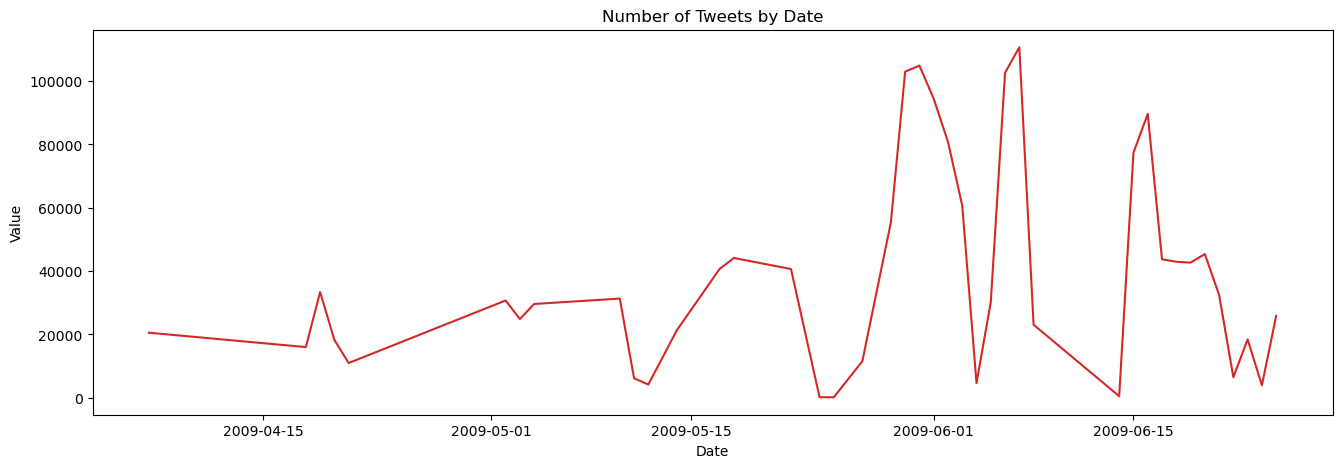

In [51]:
# Define the plot_df function
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(tweets_by_date, x=tweets_by_date.index, y=tweets_by_date.values, title='Number of Tweets by Date')

## Boxplot 

In [52]:
# Resampled the data into weekly, monthly, and 3-monthly intervals and aggregate the compound values and count the tweets
weekly = df['compound'].resample('W').agg(['mean', 'count'])
monthly = df['compound'].resample('M').agg(['mean', 'count'])
three_monthly = df['compound'].resample('3M').agg(['mean', 'count'])

# Resampled and aggregated data
weekly.head(), monthly.head(), three_monthly.head()

(                               mean  count
 timestamp                                 
 2009-04-12 00:00:00+01:00  0.148636  20540
 2009-04-19 00:00:00+01:00  0.172651  49384
 2009-04-26 00:00:00+01:00  0.161337  29229
 2009-05-03 00:00:00+01:00  0.165892  55575
 2009-05-10 00:00:00+01:00  0.175227  60925,
                                mean   count
 timestamp                                  
 2009-04-30 00:00:00+01:00  0.164340   99153
 2009-05-31 00:00:00+01:00  0.175203  548795
 2009-06-30 00:00:00+01:00  0.100415  936519,
                                mean    count
 timestamp                                   
 2009-04-30 00:00:00+01:00  0.164340    99153
 2009-07-31 00:00:00+01:00  0.128048  1485314)

C:\Users\swast\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


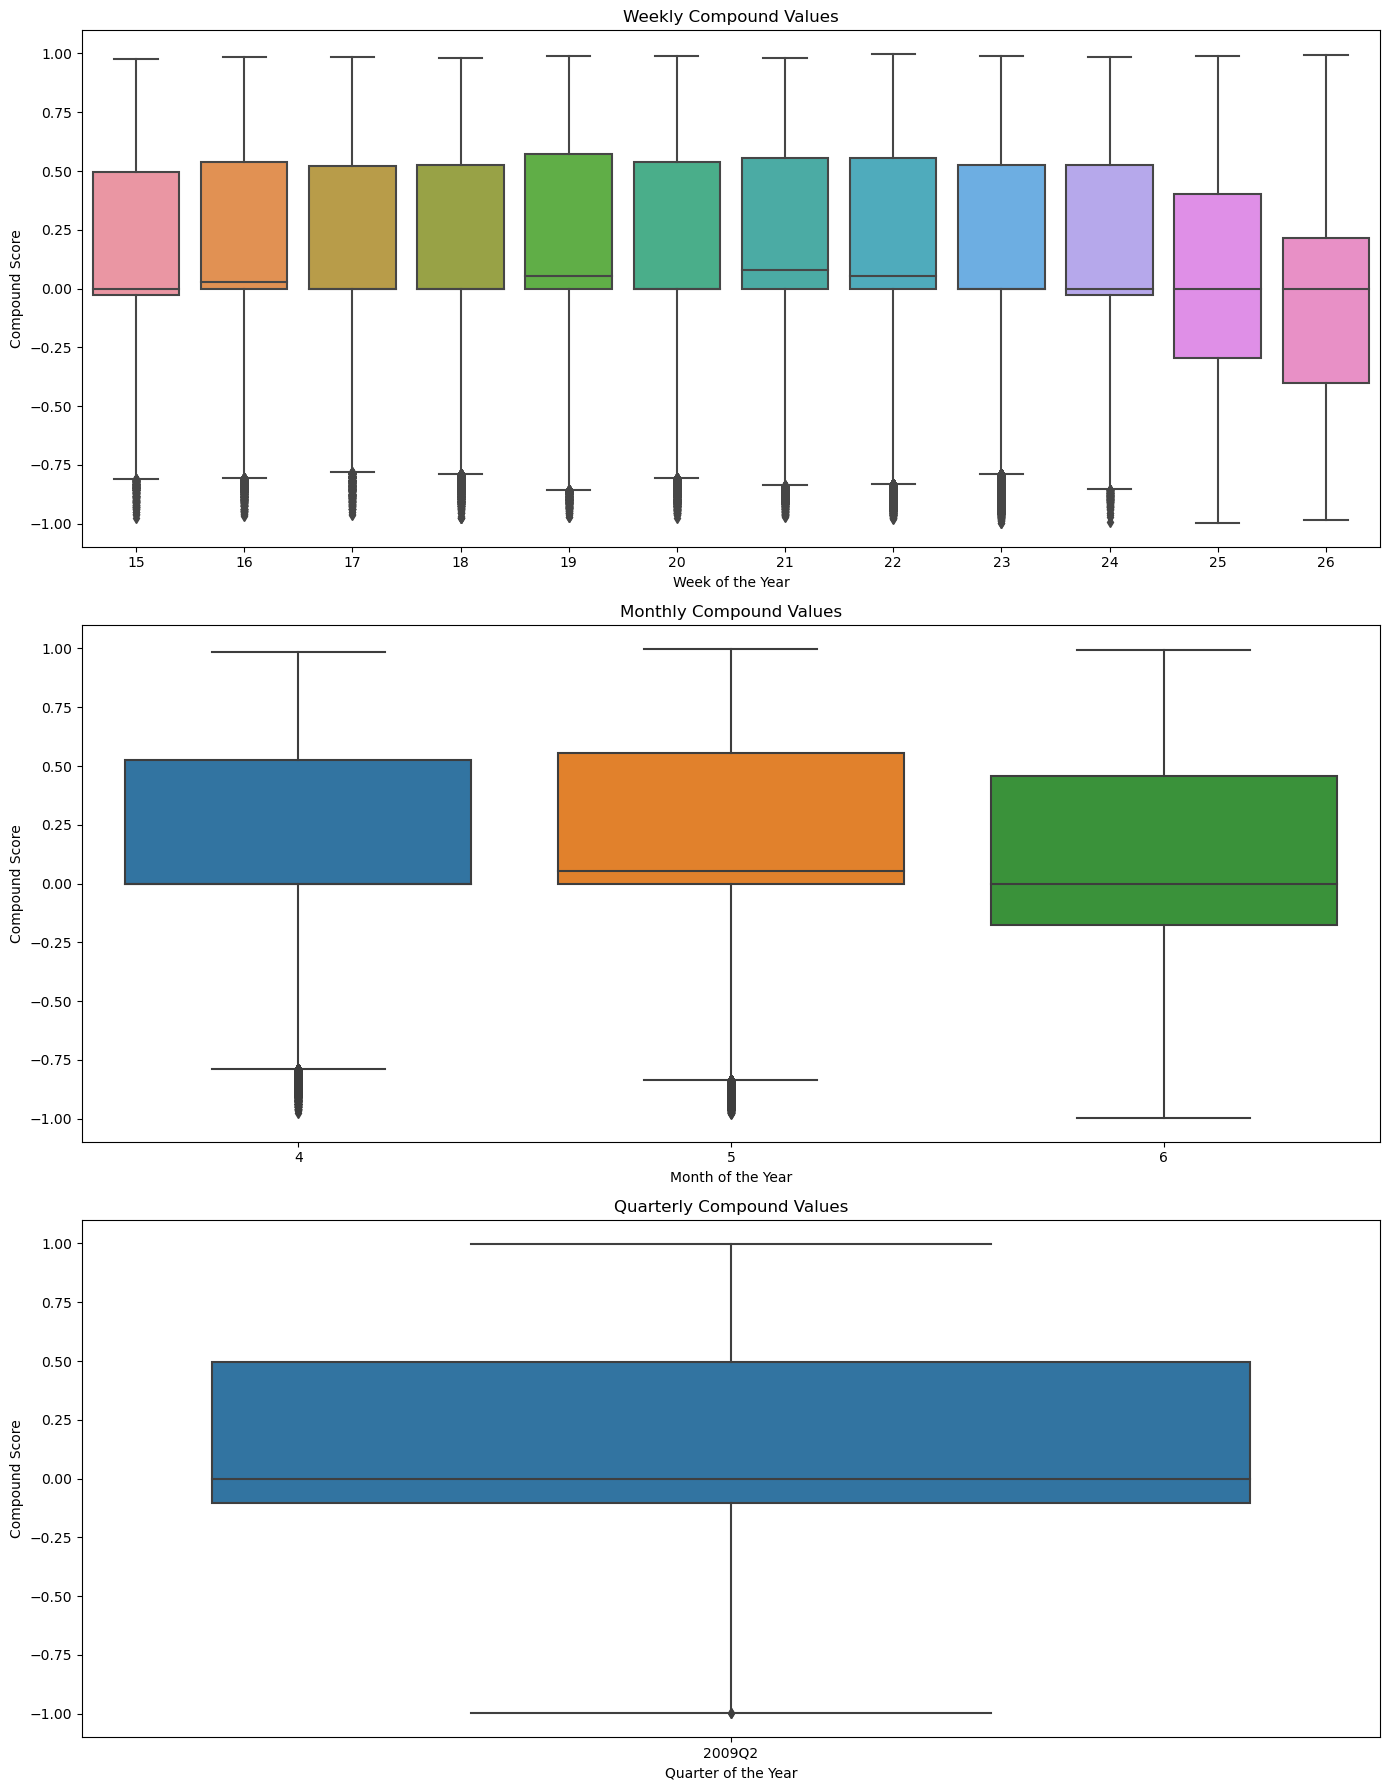

In [53]:
import seaborn as sns

# Create a column for week, month, and quarter to facilitate boxplot grouping
df['week_of_year'] = df.index.isocalendar().week
df['month_of_year'] = df.index.month
df['quarter_of_year'] = df.index.to_period('Q')

# Separate dataframes for the boxplot data
# For the compound score
weekly_compound_data = df[['compound', 'week_of_year']]
monthly_compound_data = df[['compound', 'month_of_year']]
quarterly_compound_data = df[['compound', 'quarter_of_year']]

# For the tweet count, we need to create a separate count for each group
weekly_tweet_count = df.groupby('week_of_year')['tweet'].count().reset_index(name='count')
monthly_tweet_count = df.groupby('month_of_year')['tweet'].count().reset_index(name='count')
quarterly_tweet_count = df.groupby('quarter_of_year')['tweet'].count().reset_index(name='count')

# Create subplots for the compound value boxplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Boxplot for weekly compound values
sns.boxplot(x='week_of_year', y='compound', data=weekly_compound_data, ax=axes[0])
axes[0].set_title('Weekly Compound Values')
axes[0].set_xlabel('Week of the Year')
axes[0].set_ylabel('Compound Score')

# Boxplot for monthly compound values
sns.boxplot(x='month_of_year', y='compound', data=monthly_compound_data, ax=axes[1])
axes[1].set_title('Monthly Compound Values')
axes[1].set_xlabel('Month of the Year')
axes[1].set_ylabel('Compound Score')

# Boxplot for quarterly compound values
sns.boxplot(x=quarterly_compound_data['quarter_of_year'].astype(str), y='compound', data=quarterly_compound_data, ax=axes[2])
axes[2].set_title('Quarterly Compound Values')
axes[2].set_xlabel('Quarter of the Year')
axes[2].set_ylabel('Compound Score')

# Adjust layout
plt.tight_layout()
plt.show()

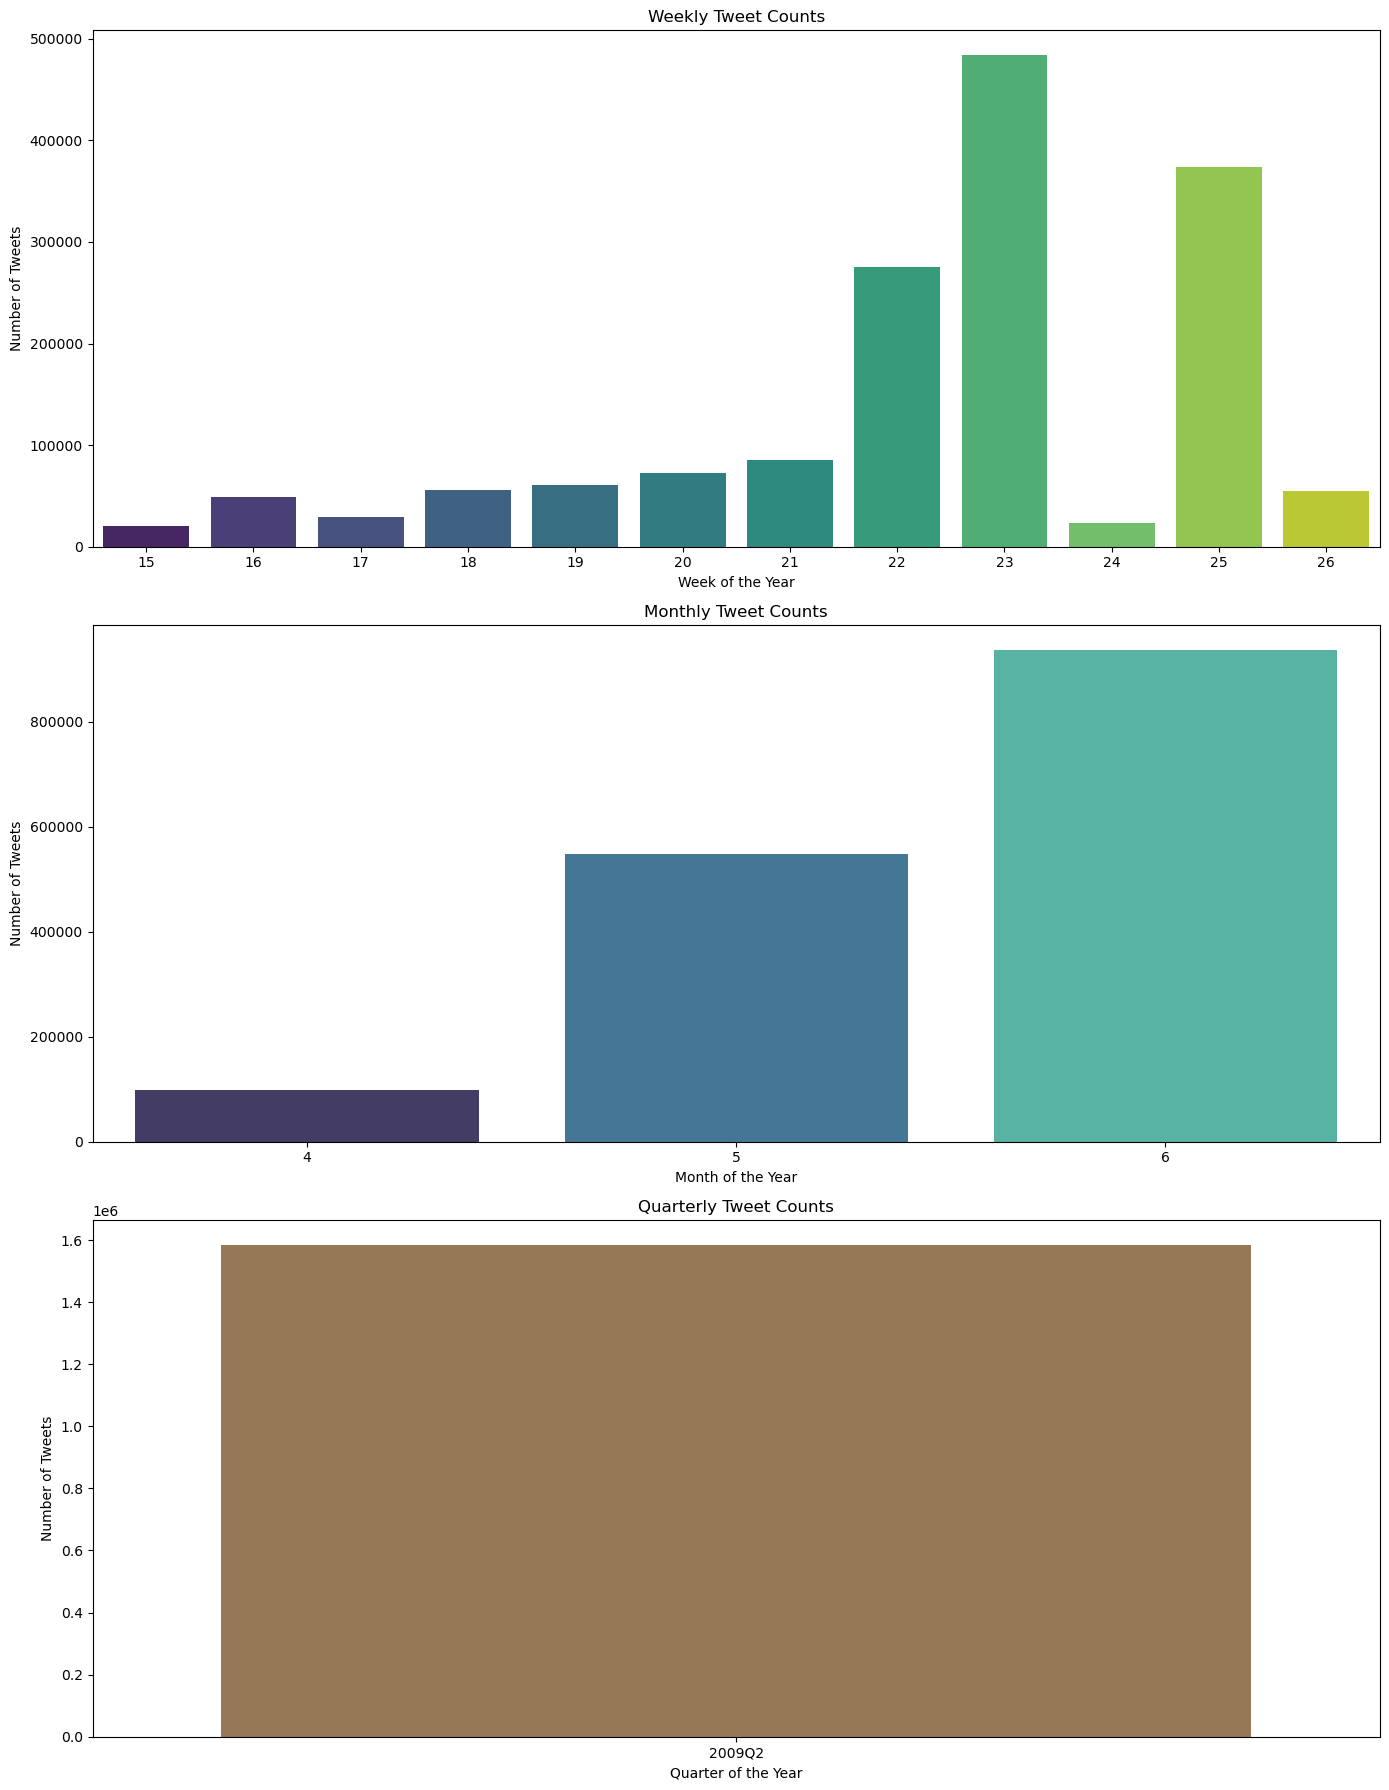

In [54]:
# Create subplots for the tweet count plots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Bar plot for weekly tweet counts
sns.barplot(x='week_of_year', y='count', data=weekly_tweet_count, ax=axes[0], palette="viridis")
axes[0].set_title('Weekly Tweet Counts')
axes[0].set_xlabel('Week of the Year')
axes[0].set_ylabel('Number of Tweets')

# Bar plot for monthly tweet counts
sns.barplot(x='month_of_year', y='count', data=monthly_tweet_count, ax=axes[1], palette="mako")
axes[1].set_title('Monthly Tweet Counts')
axes[1].set_xlabel('Month of the Year')
axes[1].set_ylabel('Number of Tweets')

# Bar plot for quarterly tweet counts
sns.barplot(x=quarterly_tweet_count['quarter_of_year'].astype(str), y='count', data=quarterly_tweet_count, ax=axes[2], palette="cubehelix")
axes[2].set_title('Quarterly Tweet Counts')
axes[2].set_xlabel('Quarter of the Year')
axes[2].set_ylabel('Number of Tweets')

# Adjust layout
plt.tight_layout()
plt.show()

## Additive and multiplicative time series

In [55]:
df.head(5)

username  \
timestamp                                  
2009-04-07 06:20:09+01:00        mimismo   
2009-04-07 07:21:35+01:00   lamarmcarter   
2009-04-07 07:24:53+01:00   Geoffasaurus   
2009-04-07 07:35:44+01:00    kennyduduxd   
2009-04-07 08:30:07+01:00  Tsukihysteria   

                                                                       tweet  \
timestamp                                                                      
2009-04-07 06:20:09+01:00                                       que me muera   
2009-04-07 07:21:35+01:00  happy for coach stringer hof co now if i can o...   
2009-04-07 07:24:53+01:00  keeeerrrrriiiiii i really have nothing better ...   
2009-04-07 07:35:44+01:00                cant sleep dam naps lol and its hot   
2009-04-07 08:30:07+01:00  thank you for being a great character on house...   

                           negative  neutral  positive  compound  \
timestamp                                                          
2009-04-07 06:20:09+01:00     0.000    1.000     0.000    0.0000   
2009-04-07 07:21:35+01:00     0.000    0.802     0.198    0.5719   
2009-04-07 07:24:53+01:00     0.151    0.849     0.000   -0.3959   
2009-04-07 07:35:44+01:00     0.000    0.714     0.286    0.4215   
2009-04-07 08:30:07+01:00     0.150    0.531     0.319    0.5423   

                           week_of_year  month_of_year quarter_of_year  
timestamp                                                               
2009-04-07 06:20:09+01:00            15              4          2009Q2  
2009-04-07 07:21:35+01:00            15              4          2009Q2  
2009-04-07 07:24:53+01:00            15              4          2009Q2  
2009-04-07 07:35:44+01:00            15              4          2009Q2  
2009-04-07 08:30:07+01:00            15              4          2009Q2

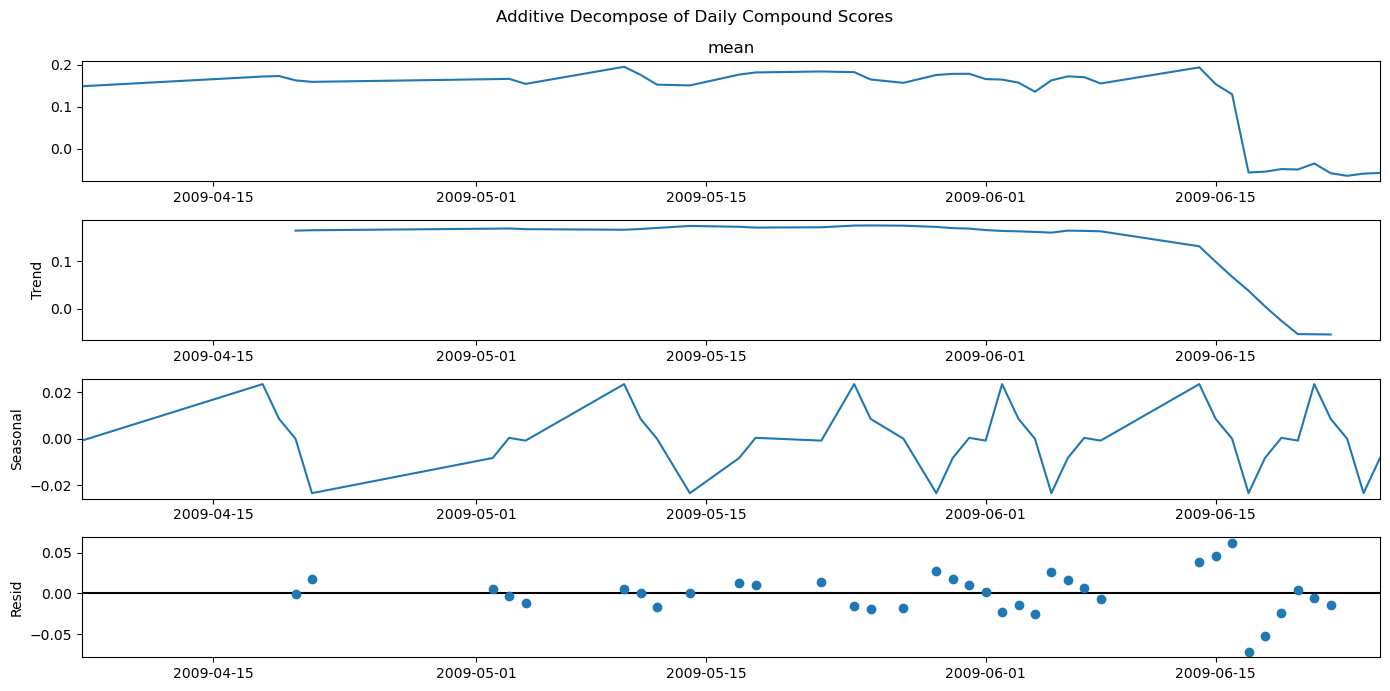

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Resample the original dataframe to daily frequency
daily = df['compound'].resample('D').agg(['mean', 'count'])

# We need to drop NaN values that might be created if there are days with no tweets
daily.dropna(inplace=True)

# We'll use a period of 7 to reflect weekly seasonality
daily_period = 7  # This implies a weekly cycle

# Perform additive seasonal decomposition
decomposition_daily_add = seasonal_decompose(daily['mean'], model='additive', period=daily_period)

# Plot the decomposed components
fig = decomposition_daily_add.plot()
fig.set_size_inches(14, 7)
plt.suptitle('Additive Decompose of Daily Compound Scores')
plt.tight_layout()
plt.show()

## Stationary and Non-Stationary Time Series

In [57]:
# We will only keep the 'compound' column going forward to ease teh computation load
df = df[['compound']]
df.head(5)

compound
timestamp                          
2009-04-07 06:20:09+01:00    0.0000
2009-04-07 07:21:35+01:00    0.5719
2009-04-07 07:24:53+01:00   -0.3959
2009-04-07 07:35:44+01:00    0.4215
2009-04-07 08:30:07+01:00    0.5423

In [58]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(daily['mean'])

# Create a DataFrame to hold the results
adf_test_results = pd.DataFrame({
    'ADF Statistic': [adf_result[0]],
    'p-value': [adf_result[1]],
    'No. Lags Used': [adf_result[2]],
    'Number of Observations Used': [adf_result[3]],
    'Critical Value (1%)': [adf_result[4]['1%']],
    'Critical Value (5%)': [adf_result[4]['5%']],
    'Critical Value (10%)': [adf_result[4]['10%']]
})

adf_test_results

ADF Statistic   p-value  No. Lags Used  Number of Observations Used  \
0      -0.365477  0.915705              0                           40   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
0            -3.605565            -2.937069             -2.606986

In [59]:
df.head()

compound
timestamp                          
2009-04-07 06:20:09+01:00    0.0000
2009-04-07 07:21:35+01:00    0.5719
2009-04-07 07:24:53+01:00   -0.3959
2009-04-07 07:35:44+01:00    0.4215
2009-04-07 08:30:07+01:00    0.5423

In [60]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
kpss_result = kpss(daily['mean'], regression='c')

# Create a DataFrame to hold the results
kpss_test_results = pd.DataFrame({
    'KPSS Statistic': [kpss_result[0]],
    'p-value': [kpss_result[1]],
    'No. Lags Used': [kpss_result[2]],
    'Critical Value (10%)': [kpss_result[3]['10%']],
    'Critical Value (5%)': [kpss_result[3]['5%']],
    'Critical Value (2.5%)': [kpss_result[3]['2.5%']],
    'Critical Value (1%)': [kpss_result[3]['1%']]
})

kpss_test_results

KPSS Statistic   p-value  No. Lags Used  Critical Value (10%)  \
0        0.592361  0.023331              4                 0.347   

   Critical Value (5%)  Critical Value (2.5%)  Critical Value (1%)  
0                0.463                  0.574                0.739

In [61]:
# Apply first-order differencing to the daily mean compound scores
daily_diff = daily['mean'].diff().dropna()

# Perform ADF test on the differenced data
adf_result_diff = adfuller(daily_diff)
adf_test_results_diff = pd.DataFrame({
    'ADF Statistic': [adf_result_diff[0]],
    'p-value': [adf_result_diff[1]],
    'No. Lags Used': [adf_result_diff[2]],
    'Number of Observations Used': [adf_result_diff[3]],
    'Critical Value (1%)': [adf_result_diff[4]['1%']],
    'Critical Value (5%)': [adf_result_diff[4]['5%']],
    'Critical Value (10%)': [adf_result_diff[4]['10%']]
})

# Perform KPSS test on the differenced data
kpss_result_diff = kpss(daily_diff, regression='c')
kpss_test_results_diff = pd.DataFrame({
    'KPSS Statistic': [kpss_result_diff[0]],
    'p-value': [kpss_result_diff[1]],
    'No. Lags Used': [kpss_result_diff[2]],
    'Critical Value (10%)': [kpss_result_diff[3]['10%']],
    'Critical Value (5%)': [kpss_result_diff[3]['5%']],
    'Critical Value (2.5%)': [kpss_result_diff[3]['2.5%']],
    'Critical Value (1%)': [kpss_result_diff[3]['1%']]
})

adf_test_results_diff, kpss_test_results_diff

C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(   ADF Statistic       p-value  No. Lags Used  Number of Observations Used  \
 0       -6.02326  1.476395e-07              0                           39   
 
    Critical Value (1%)  Critical Value (5%)  Critical Value (10%)  
 0              -3.6104            -2.939109             -2.608063  ,
    KPSS Statistic  p-value  No. Lags Used  Critical Value (10%)  \
 0        0.209318      0.1              1                 0.347   
 
    Critical Value (5%)  Critical Value (2.5%)  Critical Value (1%)  
 0                0.463                  0.574                0.739  )

C:\Users\swast\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 20 must be < 20.

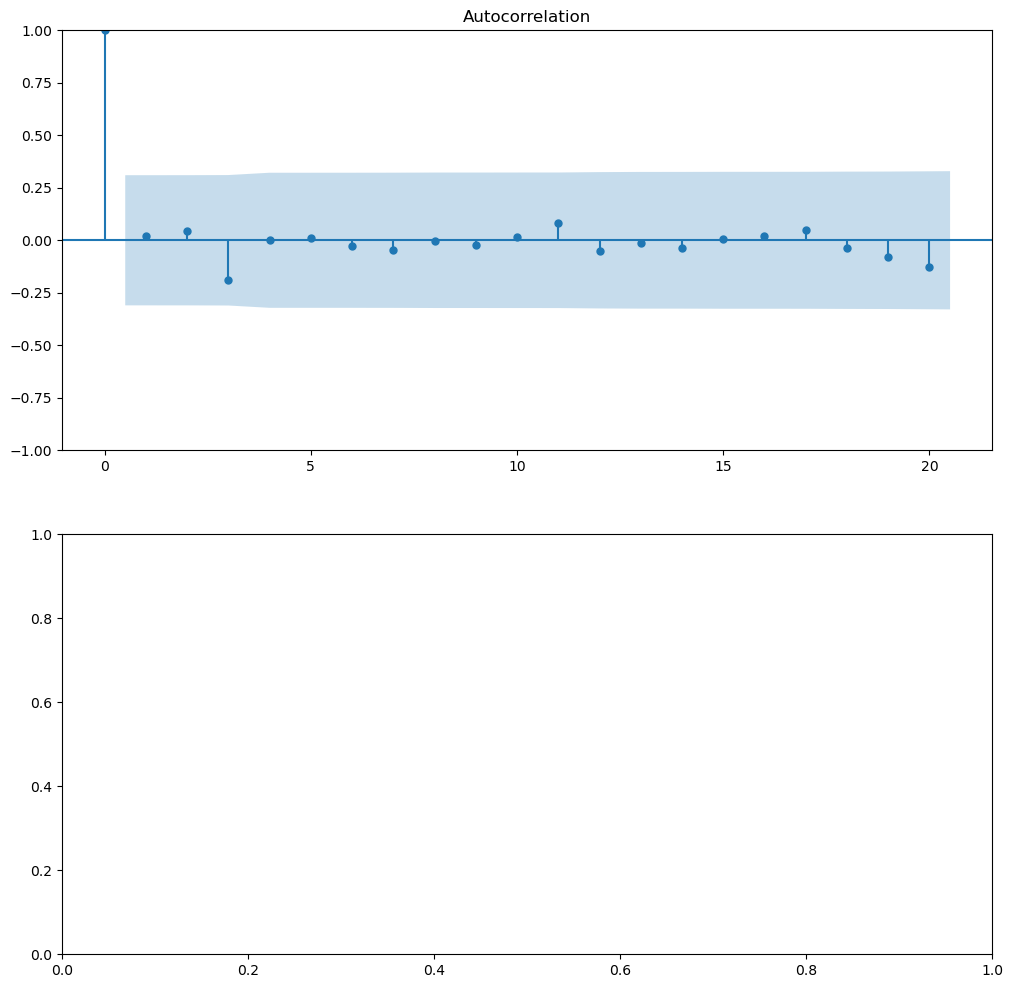

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the ACF on the first plot
plot_acf(daily_diff, lags=20, ax=ax1)

# Plot the PACF on the second plot
plot_pacf(daily_diff, lags=20, ax=ax2)

plt.show()

In [ ]:
# Re-plot ACF and PACF with fewer lags. The number of lags must be less than half of the sample size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the ACF on the first plot with fewer lags
plot_acf(daily_diff, lags=10, ax=ax1)

# Plot the PACF on the second plot with fewer lags
plot_pacf(daily_diff, lags=10, ax=ax2)

plt.show()


C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:                   mean   No. Observations:                   41
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  78.704
Date:                Fri, 10 Nov 2023   AIC                           -151.408
Time:                        00:55:22   BIC                           -146.341
Sample:                             0   HQIC                          -149.576
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2380     11.077      0.021      0.983     -21.473      21.948
ma.L1         -0.1889     11.044     -0.017      0.986     -21.834      21.456
sigma2         0.0011      0.000      4.529      0.0

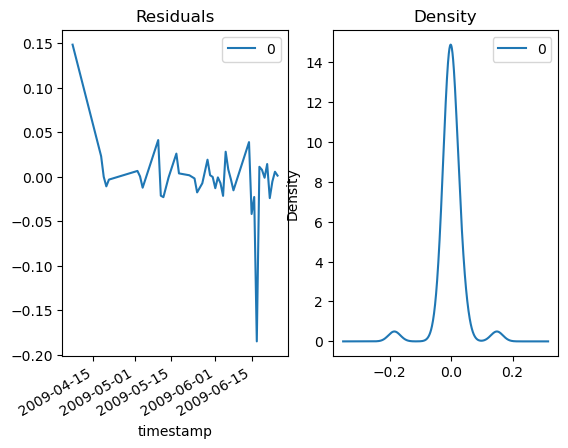

In [63]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(daily['mean'], order=(1,1,1))
results = model.fit()

# Summarize model results
print(results.summary())

# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


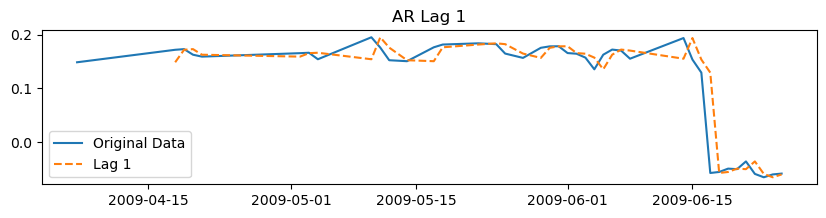

NameError: name 'model_fit' is not defined

In [68]:
import matplotlib.pyplot as plt


p = 1  
q = 1  

# Plot the AR lags
for i in range(1, p + 1):
    plt.figure(figsize=(10, 2))
    plt.plot(daily['mean'], label='Original Data')
    plt.plot(daily['mean'].shift(i), label=f'Lag {i}', linestyle='--')
    plt.title(f'AR Lag {i}')
    plt.legend()
    plt.show()

# Plot the MA lags 
residuals = model_fit.resid
for i in range(1, q + 1):
    plt.figure(figsize=(10, 2))
    plt.plot(residuals, label='Residuals')
    plt.plot(residuals.shift(i), label=f'Lag {i}', linestyle='--')
    plt.title(f'MA Lag {i}')
    plt.legend()
    plt.show()

C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


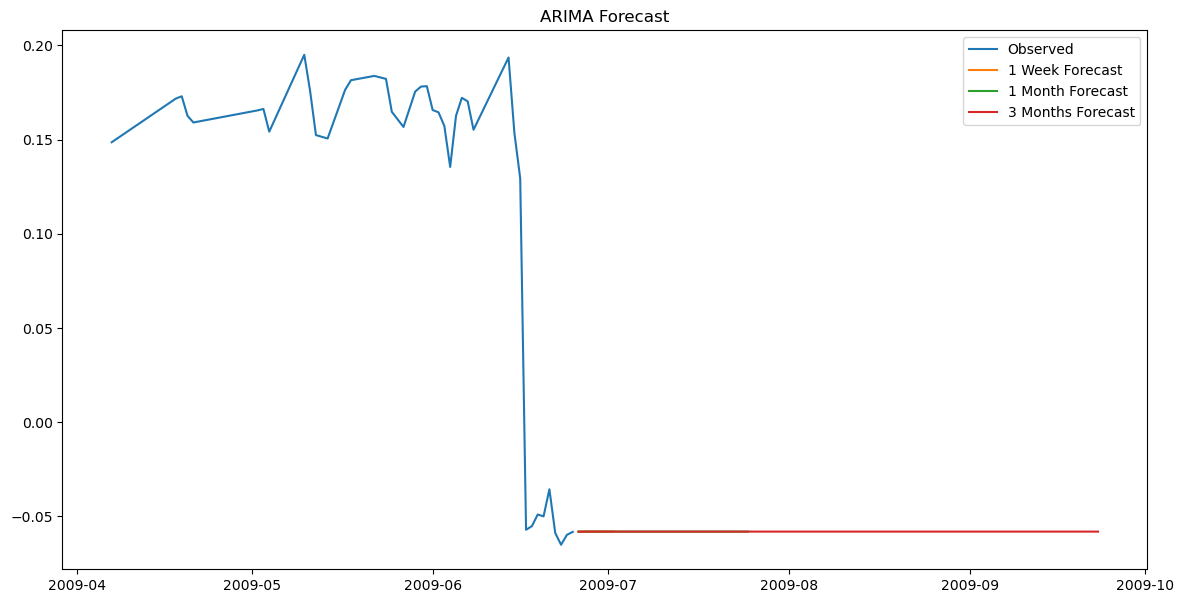

In [64]:
# Get the last date of the observed data
last_date = daily.index[-1]

# Generate the forecast date ranges
date_range_week = pd.date_range(start=last_date, periods=8, freq='D')[1:]  # Exclude the last observed date
date_range_month = pd.date_range(start=last_date, periods=31, freq='D')[1:]  # Assume a month as 30 days + 1
date_range_three_months = pd.date_range(start=last_date, periods=91, freq='D')[1:]  # Assume 3 months as 90 days + 1

# Generate the forecasts
forecast_1_week = results.get_forecast(steps=7)
forecast_1_month = results.get_forecast(steps=30)
forecast_3_months = results.get_forecast(steps=90)

# Attach the date range to the forecasts
forecast_1_week.index = date_range_week
forecast_1_month.index = date_range_month
forecast_3_months.index = date_range_three_months

# Plot the forecast along with the confidence intervals
plt.figure(figsize=(14,7))
plt.plot(daily['mean'], label='Observed')

plt.plot(forecast_1_week.index, forecast_1_week.predicted_mean, label='1 Week Forecast')
plt.plot(forecast_1_month.index, forecast_1_month.predicted_mean, label='1 Month Forecast')
plt.plot(forecast_3_months.index, forecast_3_months.predicted_mean, label='3 Months Forecast')

plt.title('ARIMA Forecast')
plt.legend()
plt.show()

C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\swast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


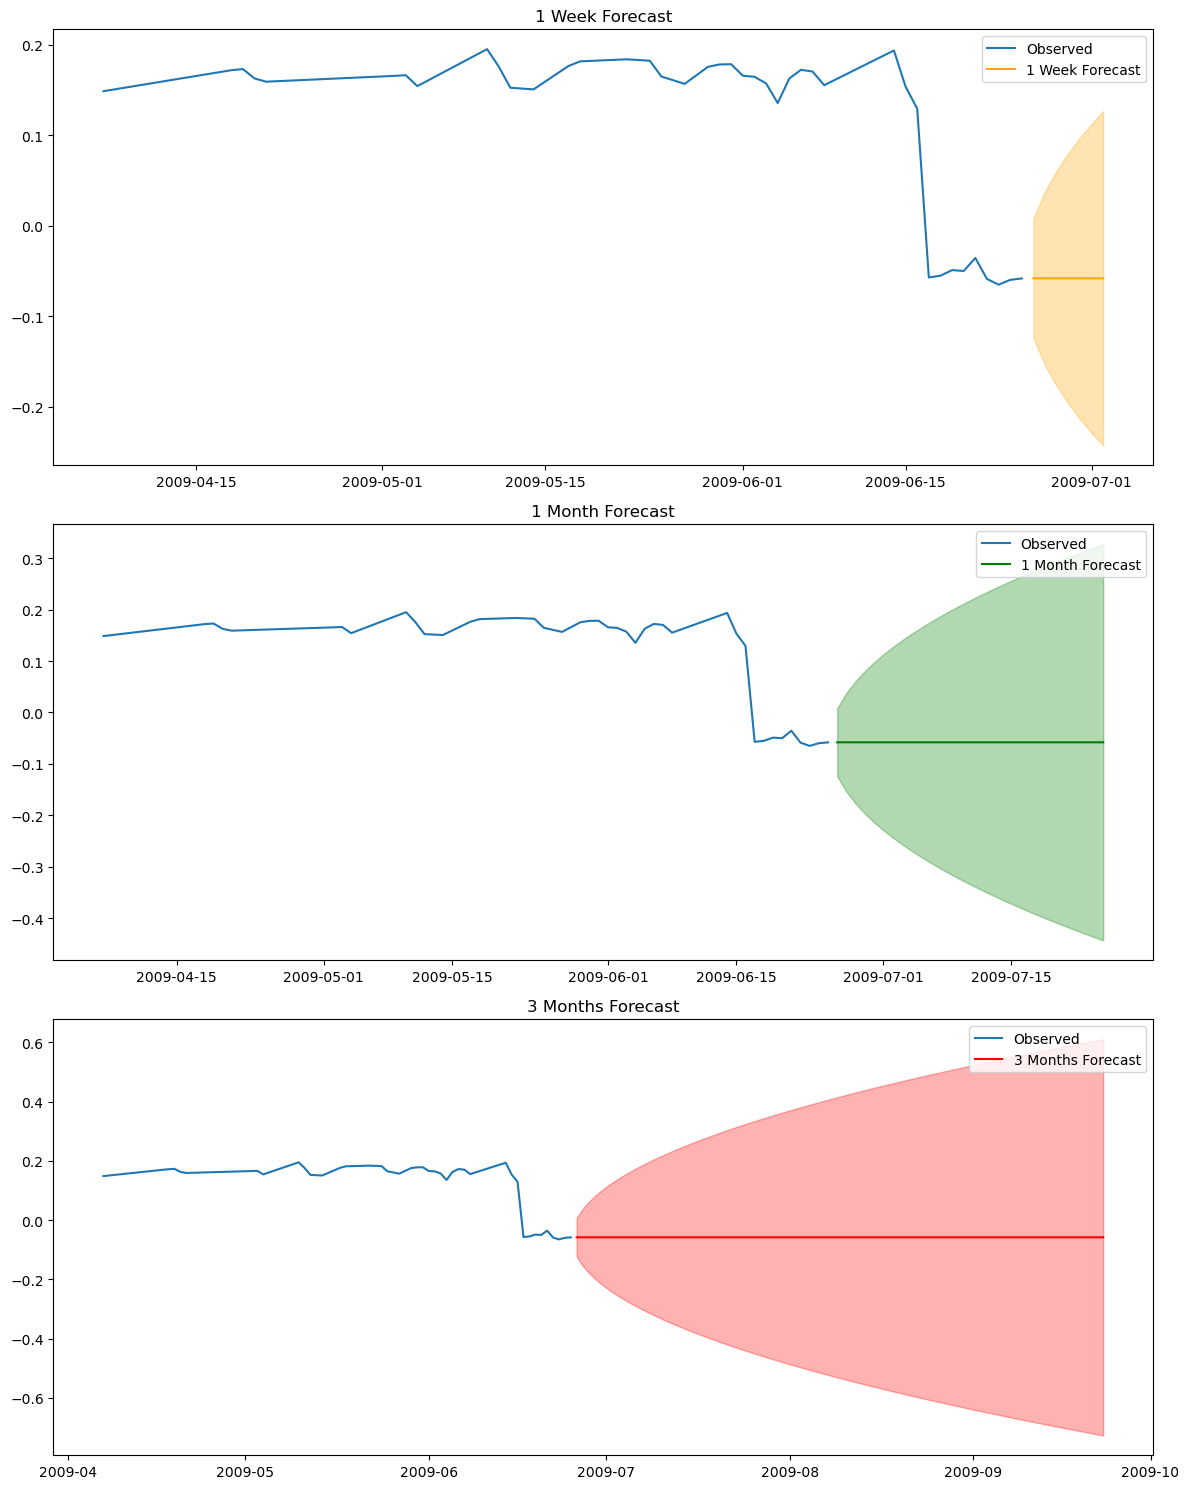

In [65]:
# Get the last date from the observed data to anchor the forecast
last_obs_date = daily.index[-1]

# Create forecast date ranges starting from the day after the last observed date
date_range_week = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=7, freq='D')
date_range_month = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
date_range_three_months = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=90, freq='D')

# Generate the forecasts
forecast_1_week = results.get_forecast(steps=7)
forecast_1_month = results.get_forecast(steps=30)
forecast_3_months = results.get_forecast(steps=90)

# Confidence intervals
forecast_1_week_ci = forecast_1_week.conf_int()
forecast_1_month_ci = forecast_1_month.conf_int()
forecast_3_months_ci = forecast_3_months.conf_int()

# Plotting each forecast period separately
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# 1 Week Forecast
axes[0].plot(daily['mean'], label='Observed')
axes[0].plot(date_range_week, forecast_1_week.predicted_mean, label='1 Week Forecast', color='orange')
axes[0].fill_between(date_range_week, forecast_1_week_ci.iloc[:, 0], forecast_1_week_ci.iloc[:, 1], color='orange', alpha=0.3)
axes[0].set_title('1 Week Forecast')
axes[0].legend()

# 1 Month Forecast
axes[1].plot(daily['mean'], label='Observed')
axes[1].plot(date_range_month, forecast_1_month.predicted_mean, label='1 Month Forecast', color='green')
axes[1].fill_between(date_range_month, forecast_1_month_ci.iloc[:, 0], forecast_1_month_ci.iloc[:, 1], color='green', alpha=0.3)
axes[1].set_title('1 Month Forecast')
axes[1].legend()

# 3 Months Forecast
axes[2].plot(daily['mean'], label='Observed')
axes[2].plot(date_range_three_months, forecast_3_months.predicted_mean, label='3 Months Forecast', color='red')
axes[2].fill_between(date_range_three_months, forecast_3_months_ci.iloc[:, 0], forecast_3_months_ci.iloc[:, 1], color='red', alpha=0.3)
axes[2].set_title('3 Months Forecast')
axes[2].legend()

plt.tight_layout()
plt.show()


In [66]:
# A simplified dashboard was created to allow for ARIMA parameters adjustment and see the updated forecast dynamically
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Function to update and display the graph based on the inputs
def update_graph(p, d, q):
    # Fit the ARIMA model
    model = ARIMA(daily['mean'], order=(p, d, q))
    results = model.fit()
    
    # Forecast 1 month ahead
    forecast = results.get_forecast(steps=30)
    forecast_index = pd.date_range(start=daily.index[-1], periods=31, freq='D')[1:]
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Plot the observed data
    plt.figure(figsize=(10, 5))
    plt.plot(daily['mean'], label='Observed', color='blue')
    
    # Plot the forecast
    plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
    plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    
    # Show the plot with the updated forecast
    plt.legend()
    plt.show()

# Create interactive widgets for the ARIMA parameters
p_slider = widgets.IntSlider(min=0, max=5, step=1, value=3, description='p')
d_slider = widgets.IntSlider(min=0, max=2, step=1, value=1, description='d')
q_slider = widgets.IntSlider(min=0, max=5, step=1, value=3, description='q')

# Using `interactive_output` to create independent graph updates without the need for a button
interactive_plot = widgets.interactive_output(update_graph, {'p': p_slider, 'd': d_slider, 'q': q_slider})

# Display the sliders and the output
display(p_slider, d_slider, q_slider, interactive_plot)


IntSlider(value=3, description='p', max=5)

IntSlider(value=1, description='d', max=2)

IntSlider(value=3, description='q', max=5)

Output()